# Лабрраторная работа 3
## Акулич Кирилл 853504 (2 вариант)

$$ f(x,y) = \frac{1}{2}*sin(x+y)  \forall x, y: 0 \le x, y \le \frac{\pi}{2}$$

$$ 
    f(x) = \int_0^\frac{\pi}{2} \frac{1}{2}*sin(x+y) dy 
    f(x) = \frac{1}{2}*(sin(x) +cos(x)) = \frac{\sqrt{2}}{2}*cos(x-\frac{\pi}{4}) 
$$

Функцию распределения СВ х:
$$
    F(x) = \int_0^x f(x) dx = \int_0^z \frac{\sqrt{2}}{2}*cos(x-\frac{\pi}{4}) dx = \frac{\sqrt{2}}{2} * (sin(x-\pi/4) + \frac{\sqrt{2}}{2})
$$

Найдем функцию, обратную к данной
$$
    x = arcsin(\frac{2}{\sqrt{2}}*R_1 -  \frac{1}{\sqrt{2}}) + \pi/4
$$

Найдем условную функцию для y
$$
    f(y | x = x_1) = \frac{f(x_1,y)}{f(x_1)}
$$
$$
    F(y | x = x_1) = \int_0^\frac{\pi}{2} \frac{1}{2} * \frac{sin(x_1+y)}{f(x_1)}
$$
$$
    F(y | x = x_1) =\frac{1}{2*(f(x_1))}*(-cos(x_1 + y)-(-cos(x_1)))  
$$
$$
    cos(x_1) - 2*f(x_1)*R_2 = cos(x_1+y)
$$
$$
    y= arccos(cos(x_1)-2*f(x_1)*R_2) - x_1
$$

F(x) and inv(F(x))


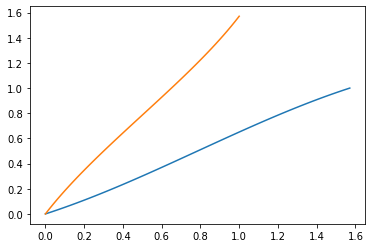

X hist


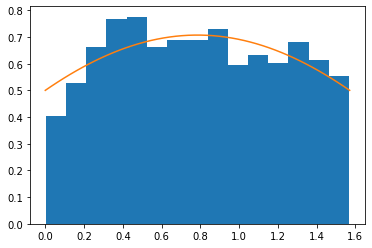

F(y) and inv(F(y)) x1:0.5


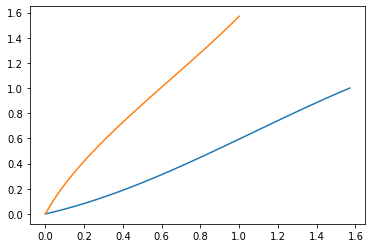

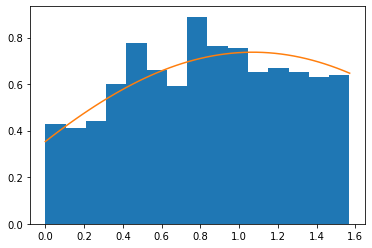

0.7906571293168992
0.7683131404529596


In [48]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

SQRT_2 = 2**(0.5)
SQRT_2_INV = 1 / SQRT_2

def f(x,y):
    return 0.5*np.sin(x+y)
def f_x(x):
    return SQRT_2_INV*np.cos(x-np.pi/4)
def F_X(x):
    return SQRT_2_INV*(math.sin(x-np.pi/4) + SQRT_2_INV)
def get_x(R1):
    return np.arcsin(SQRT_2*R1 - SQRT_2_INV) + np.pi/4

def get_y(R2,x1):
    return np.arccos(np.cos(x1) - 2* f_x(x1)*R2) - x1
def F_Y(y,x1):
    return 1/(2*f_x(x1))*(-np.cos(x1+y) +np.cos(x1))
def f_y(y,x1):
    return f(x1,y)/f_x(x1)
def vector_generator_2d():
    while True:
        R1 = random.random()
        R2 = random.random()
        x = get_x(R1)
        y = get_y(R2,x)
        yield (x,y)

def y_generator(x1):
    while True:
        R2 = random.random()
        y = get_y(R2,x1)
        yield y

x_y_points =list()
vector_2d_generator = vector_generator_2d()
for _ in range(1000):
    x,y = next(vector_2d_generator)
    x_y_points.append((x,y))
print("F(x) and inv(F(x))")
x_ls = np.linspace(0,np.pi/2)
_x = np.linspace(0,1)
plt.plot(x_ls,[F_X(x) for x in x_ls])
plt.plot(_x,[get_x(x) for x in _x])

plt.show()
print("X hist")
plt.hist([vector[0] for vector in x_y_points],bins=15,density=True)
plt.plot(x_ls,[f_x(x) for x in x_ls])
plt.show()

x1 = 0.5
print(f"F(y) and inv(F(y)) x1:{x1}")
y_ls = np.linspace(0,np.pi/2)
_y = np.linspace(0,1)

y_gen = y_generator(x1)
y_points = [next(y_gen) for _ in range(1000)]

plt.plot(y_ls,[F_Y(y,x1) for y in y_ls])
plt.plot(_y,[get_y(y,x1) for y in _y])
plt.show()

plt.hist([y for y in y_points],bins=15,density=True)
plt.plot(y_ls,[f_y(y,x1) for y in y_ls])
plt.show()


    

# Оценки случайной величины<br>
## Теоретические:<br>
### M(x),M(y): <br>

![](1.png)

### D(x),D(y):<br>
![](2.png)

### cor(x,y) <br>
$$
M(x,y) = -1 - \frac{\pi^2}{16} + \frac{\pi}{2}      
cor = -0.24

$$

$$
 M(x),M(y) =\frac{\pi}{4}
$$

$$
D(x),D(y) = -2 + \frac{\pi}{4} + \frac{\pi}{16}
$$


In [50]:
print(f"M(x) = {np.mean([vector[0] for vector in x_y_points])}")
print(f"M(y) = {np.mean([vector[1] for vector in x_y_points])}")


print(f"D(x) = {np.var([vector[0] for vector in x_y_points])}")
print(f"D(y) = {np.var([vector[1] for vector in x_y_points])}")

print(f"Corr(x,y): {np.corrcoef([vector[0] for vector in x_y_points],[vector[1] for vector in x_y_points])}")

M(x) = 0.7906571293168992
M(y) = 0.7683131404529596
D(x) = 0.18731833357235156
D(y) = 0.18062055420956147


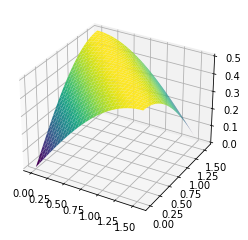

NameError: name 'x_y_points' is not defined

<Figure size 432x288 with 0 Axes>

In [16]:
'''
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = [1/2]
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()
'''

x = np.linspace(0, np.pi/2, 30)
y = np.linspace(0, np.pi/2, 30)

X, Y = np.meshgrid(x, y)
Z = 0.5*np.sin(X + Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.show()

fig2 = plt.figure()
N,x_bins,y_bins,_ = plt.hist2d([vector[0] for vector in x_y_points], [vector[1] for vector in x_y_points],bins=30)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()


Теоретические значения СВ:
M(X):
$$
    M(x) = \int_0^(\pi/2) f(x) = \pi/4
    D(x) = M[X^2] -(M[X])^2 = \pi^2/(4*\sqrt(2)) + \pi/\sqrt(2) - 4/\sqrt(2) - \pi^2/16 = 1.137 + 0.61685027506 = 1.795
    cov(x,y) = \int_0^(\pi/4) dx \int_0^(\pi/4) ((((x - pi/4)*(y - pi/4))/2)*sin(x + y), (y, 0, pi/2), (x, 0, pi/2)) = -0.0460539482731883
    corr = -0.02565679569536953
$$